<a href="https://colab.research.google.com/github/somesh-kb/Multivariate-Time-Series-Forecasting-LSTM/blob/main/Time_Series_Forecasting_Multivariate_London_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Bike Rental Prediction using LSTM**
Data vailable @ https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset?select=london_merged.csv




In [4]:
import pandas as pd 
import numpy as np 

In [6]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/london_merged.csv')

In [8]:
print(df.shape)

(17414, 10)


In [9]:
print(df.head(5))

             timestamp  cnt   t1  ...  is_holiday  is_weekend  season
0  2015-01-04 00:00:00  182  3.0  ...         0.0         1.0     3.0
1  2015-01-04 01:00:00  138  3.0  ...         0.0         1.0     3.0
2  2015-01-04 02:00:00  134  2.5  ...         0.0         1.0     3.0
3  2015-01-04 03:00:00   72  2.0  ...         0.0         1.0     3.0
4  2015-01-04 04:00:00   47  2.0  ...         0.0         1.0     3.0

[5 rows x 10 columns]


In [10]:
print(df.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


#**date time format**

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'],infer_datetime_format=True)

In [12]:
print(df.dtypes)

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object


In [13]:
print(df.head(5))

            timestamp  cnt   t1  ...  is_holiday  is_weekend  season
0 2015-01-04 00:00:00  182  3.0  ...         0.0         1.0     3.0
1 2015-01-04 01:00:00  138  3.0  ...         0.0         1.0     3.0
2 2015-01-04 02:00:00  134  2.5  ...         0.0         1.0     3.0
3 2015-01-04 03:00:00   72  2.0  ...         0.0         1.0     3.0
4 2015-01-04 04:00:00   47  2.0  ...         0.0         1.0     3.0

[5 rows x 10 columns]


In [14]:
print(df.columns)

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13919d0c18>,
      dtype=object)

<Figure size 864x1872 with 0 Axes>

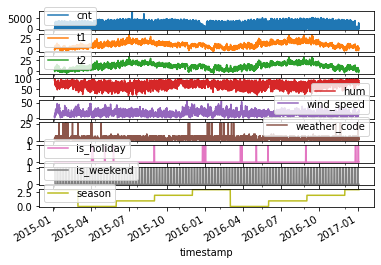

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,26))
df.set_index('timestamp')[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season']].plot(subplots=True)

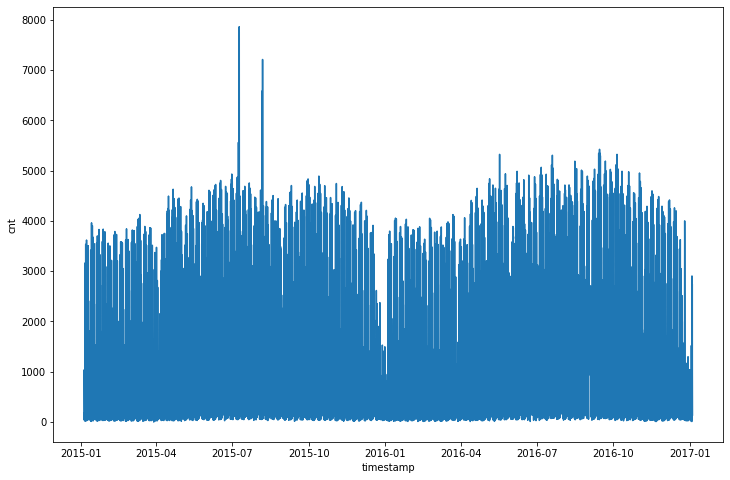

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(12,8))
sns.lineplot(x='timestamp', y = 'cnt', data=df)
plt.show()

#**Check for missing values**

In [17]:
for col in df.columns:
  print(col, df[col].isnull().sum())

timestamp 0
cnt 0
t1 0
t2 0
hum 0
wind_speed 0
weather_code 0
is_holiday 0
is_weekend 0
season 0


In [92]:
df1 = df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season']]
print(df.columns)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df1)

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')


In [19]:
print(scaled_data)

[[0.02315522 0.12676056 0.2        ... 0.         1.         1.        ]
 [0.01755725 0.12676056 0.2125     ... 0.         1.         1.        ]
 [0.01704835 0.11267606 0.2125     ... 0.         1.         1.        ]
 ...
 [0.04287532 0.1971831  0.1875     ... 0.         0.         1.        ]
 [0.02849873 0.1971831  0.1875     ... 0.         0.         1.        ]
 [0.01768448 0.18309859 0.175      ... 0.         0.         1.        ]]


In [21]:
print(scaled_data.shape)

(17414, 9)


In [25]:
feature = scaled_data[:,0:9]
target = scaled_data[:,0]

In [27]:
print(feature.shape)
print(target.shape)

(17414, 9)
(17414,)


In [29]:
from sklearn.model_selection import train_test_split 

train_data,test_data,train_target,test_target = train_test_split(feature,target,shuffle=False,random_state=22012021)

In [30]:
print(train_data.shape)
print(train_target.shape)

print(train_data)
print(train_target)

(13060, 9)
(13060,)
[[0.02315522 0.12676056 0.2        ... 0.         1.         1.        ]
 [0.01755725 0.12676056 0.2125     ... 0.         1.         1.        ]
 [0.01704835 0.11267606 0.2125     ... 0.         1.         1.        ]
 ...
 [0.21170483 0.61971831 0.6625     ... 0.         0.         0.33333333]
 [0.20305344 0.63380282 0.675      ... 0.         0.         0.33333333]
 [0.23129771 0.61971831 0.6625     ... 0.         0.         0.33333333]]
[0.02315522 0.01755725 0.01704835 ... 0.21170483 0.20305344 0.23129771]


In [49]:
from keras.preprocessing.sequence import TimeseriesGenerator

data_gen_train = TimeseriesGenerator(train_data,train_target,length = 5,batch_size=32)
data_gen_test = TimeseriesGenerator(test_data,test_target,length=5,batch_size=32)


In [50]:
data_gen_train[0]

(array([[[0.02315522, 0.12676056, 0.2       , ..., 0.        ,
          1.        , 1.        ],
         [0.01755725, 0.12676056, 0.2125    , ..., 0.        ,
          1.        , 1.        ],
         [0.01704835, 0.11267606, 0.2125    , ..., 0.        ,
          1.        , 1.        ],
         [0.00916031, 0.09859155, 0.2       , ..., 0.        ,
          1.        , 1.        ],
         [0.00597964, 0.09859155, 0.15      , ..., 0.        ,
          1.        , 1.        ]],
 
        [[0.01755725, 0.12676056, 0.2125    , ..., 0.        ,
          1.        , 1.        ],
         [0.01704835, 0.11267606, 0.2125    , ..., 0.        ,
          1.        , 1.        ],
         [0.00916031, 0.09859155, 0.2       , ..., 0.        ,
          1.        , 1.        ],
         [0.00597964, 0.09859155, 0.15      , ..., 0.        ,
          1.        , 1.        ],
         [0.00585242, 0.09859155, 0.2       , ..., 0.        ,
          1.        , 1.        ]],
 
        [[0.01

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping  

In [61]:
model  = Sequential()

model.add(LSTM(units=128,return_sequences=True, input_shape=(5,9)))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

In [62]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 5, 128)            70656     
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 64)             49408     
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 132,513
Trainable params: 132,513
Non-trainable params: 0
_________________________________________________________________


In [63]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss='mean_squared_error',optimizer='adam',metrics='mean_absolute_error')

In [66]:
model.fit(data_gen_train, epochs=50, validation_data =data_gen_test, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
408/408 [==============================] - 4s 9ms/step - loss: 5.9208e-04 - mean_absolute_error: 0.0154 - val_loss: 8.6236e-04 - val_mean_absolute_error: 0.0188
Epoch 2/50
408/408 [==============================] - 3s 7ms/step - loss: 5.8088e-04 - mean_absolute_error: 0.0153 - val_loss: 8.2460e-04 - val_mean_absolute_error: 0.0184
Epoch 3/50
408/408 [==============================] - 3s 7ms/step - loss: 5.7188e-04 - mean_absolute_error: 0.0152 - val_loss: 7.9899e-04 - val_mean_absolute_error: 0.0180
Epoch 4/50
408/408 [==============================] - 3s 7ms/step - loss: 5.6348e-04 - mean_absolute_error: 0.0151 - val_loss: 7.7752e-04 - val_mean_absolute_error: 0.0178
Epoch 5/50
408/408 [==============================] - 3s 7ms/step - loss: 5.5593e-04 - mean_absolute_error: 0.0151 - val_loss: 7.5922e-04 - val_mean_absolute_error: 0.0176
Epoch 6/50
408/408 [==============================] - 3s 7ms/step - loss: 5.4850e-04 - mean_absolute_error: 0.0150 - val_loss: 7.4305e-04 - 

In [67]:
predict = model.predict(data_gen_test)

In [68]:
print(predict)

[[0.14537397]
 [0.08967613]
 [0.07432897]
 ...
 [0.05854025]
 [0.03672756]
 [0.02794904]]


In [70]:
print(test_data)

[[0.28880407 0.5915493  0.6375     ... 0.         0.         0.33333333]
 [0.55839695 0.57746479 0.625      ... 0.         0.         0.33333333]
 [0.52226463 0.54929577 0.6        ... 0.         0.         0.33333333]
 ...
 [0.04287532 0.1971831  0.1875     ... 0.         0.         1.        ]
 [0.02849873 0.1971831  0.1875     ... 0.         0.         1.        ]
 [0.01768448 0.18309859 0.175      ... 0.         0.         1.        ]]


In [72]:
test_data[:,:1][5:]

array([[0.12735369],
       [0.09249364],
       [0.05712468],
       ...,
       [0.04287532],
       [0.02849873],
       [0.01768448]])

In [93]:
df_pred=pd.concat([pd.DataFrame(predict), pd.DataFrame(test_data[:,1:][5:])],axis=1)

In [94]:
print(df_pred)

             0         0       1         2         3     4    5    6         7
0     0.145374  0.549296  0.6000  0.723270  0.345133  0.08  0.0  0.0  0.333333
1     0.089676  0.535211  0.5875  0.723270  0.353982  0.08  0.0  0.0  0.333333
2     0.074329  0.521127  0.5750  0.710692  0.345133  0.08  0.0  0.0  0.333333
3     0.043089  0.521127  0.5750  0.786164  0.353982  0.08  0.0  0.0  0.333333
4     0.023796  0.492958  0.5500  0.786164  0.362832  0.12  0.0  0.0  0.333333
...        ...       ...     ...       ...       ...   ...  ...  ...       ...
4344  0.169237  0.183099  0.1750  0.761006  0.336283  0.08  0.0  0.0  1.000000
4345  0.081590  0.183099  0.1750  0.761006  0.371681  0.12  0.0  0.0  1.000000
4346  0.058540  0.197183  0.1875  0.729560  0.424779  0.12  0.0  0.0  1.000000
4347  0.036728  0.197183  0.1875  0.698113  0.407080  0.12  0.0  0.0  1.000000
4348  0.027949  0.183099  0.1750  0.698113  0.389381  0.04  0.0  0.0  1.000000

[4349 rows x 9 columns]


In [95]:
rev_trans=scaler.inverse_transform(df_pred)

In [96]:
print(rev_trans)

[[1.14263941e+03 1.80000000e+01 1.80000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.04854357e+02 1.75000000e+01 1.75000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.84225676e+02 1.70000000e+01 1.70000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [4.60126374e+02 5.50000000e+00 1.50000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [2.88678642e+02 5.50000000e+00 1.50000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [2.19679416e+02 5.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]]


In [97]:
df_final=df[predict.shape[0]*-1:]

In [98]:
df_final['Pred']=rev_trans[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [102]:
df_final

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Pred
13065,1001,18.0,18.0,78.0,19.5,3.0,0.0,0.0,1.0,1142.639406
13066,727,17.5,17.5,78.0,20.0,3.0,0.0,0.0,1.0,704.854357
13067,449,17.0,17.0,77.0,19.5,3.0,0.0,0.0,1.0,584.225676
13068,216,17.0,17.0,83.0,20.0,3.0,0.0,0.0,1.0,338.678622
13069,132,16.0,16.0,83.0,20.5,4.0,0.0,0.0,1.0,187.033453
...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1330.203544
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,641.300772
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,460.126374
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,288.678642


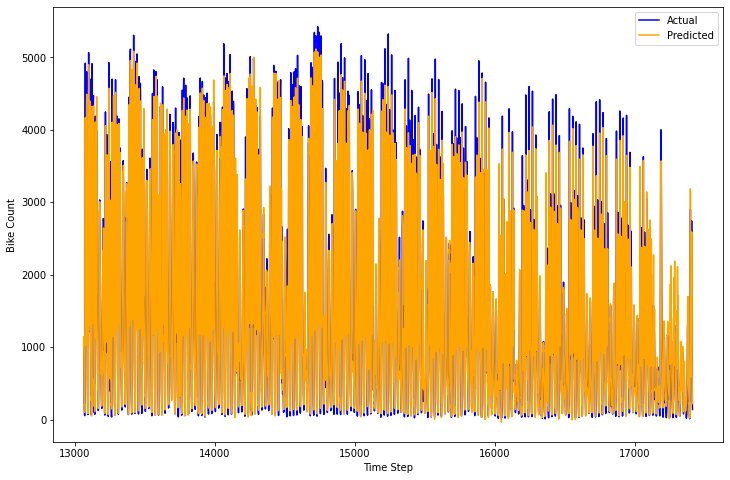

In [107]:
plt.figure(figsize=(12,8))
plt.plot(df_final['cnt'],color='blue',label='Actual')
plt.plot(df_final['Pred'],color='orange',label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Bike Count')
plt.legend()
plt.show()